In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
from scipy.stats import entropy
from scipy.optimize import minimize

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300 
np.random.seed(5201)

In [3]:
good_chains = stats.beta.rvs(2, 5,size=(2, 2000))
bad_chains0 = np.random.normal(np.sort(good_chains, axis=None), 0.05, 
                               size=4000).reshape(2, -1)
#bad_chains0[0] = np.random.normal(np.sort(good_chains[0]), 0.05,  size=2000)
#bad_chains0[1] = np.random.normal(np.sort(good_chains[0])[::-1], 0.05,  size=2000)


bad_chains1 = good_chains.copy()
for i in np.random.randint(1900, size=4):
    bad_chains1[i%2:,i:i+100] = np.random.beta(i, 950, size=100)
    
chains = {"good_chains":good_chains, 
          "bad_chains0":bad_chains0,
          "bad_chains1":bad_chains1}

In [4]:
az.ess(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 4.389e+03
    bad_chains0  float64 2.436
    bad_chains1  float64 111.1

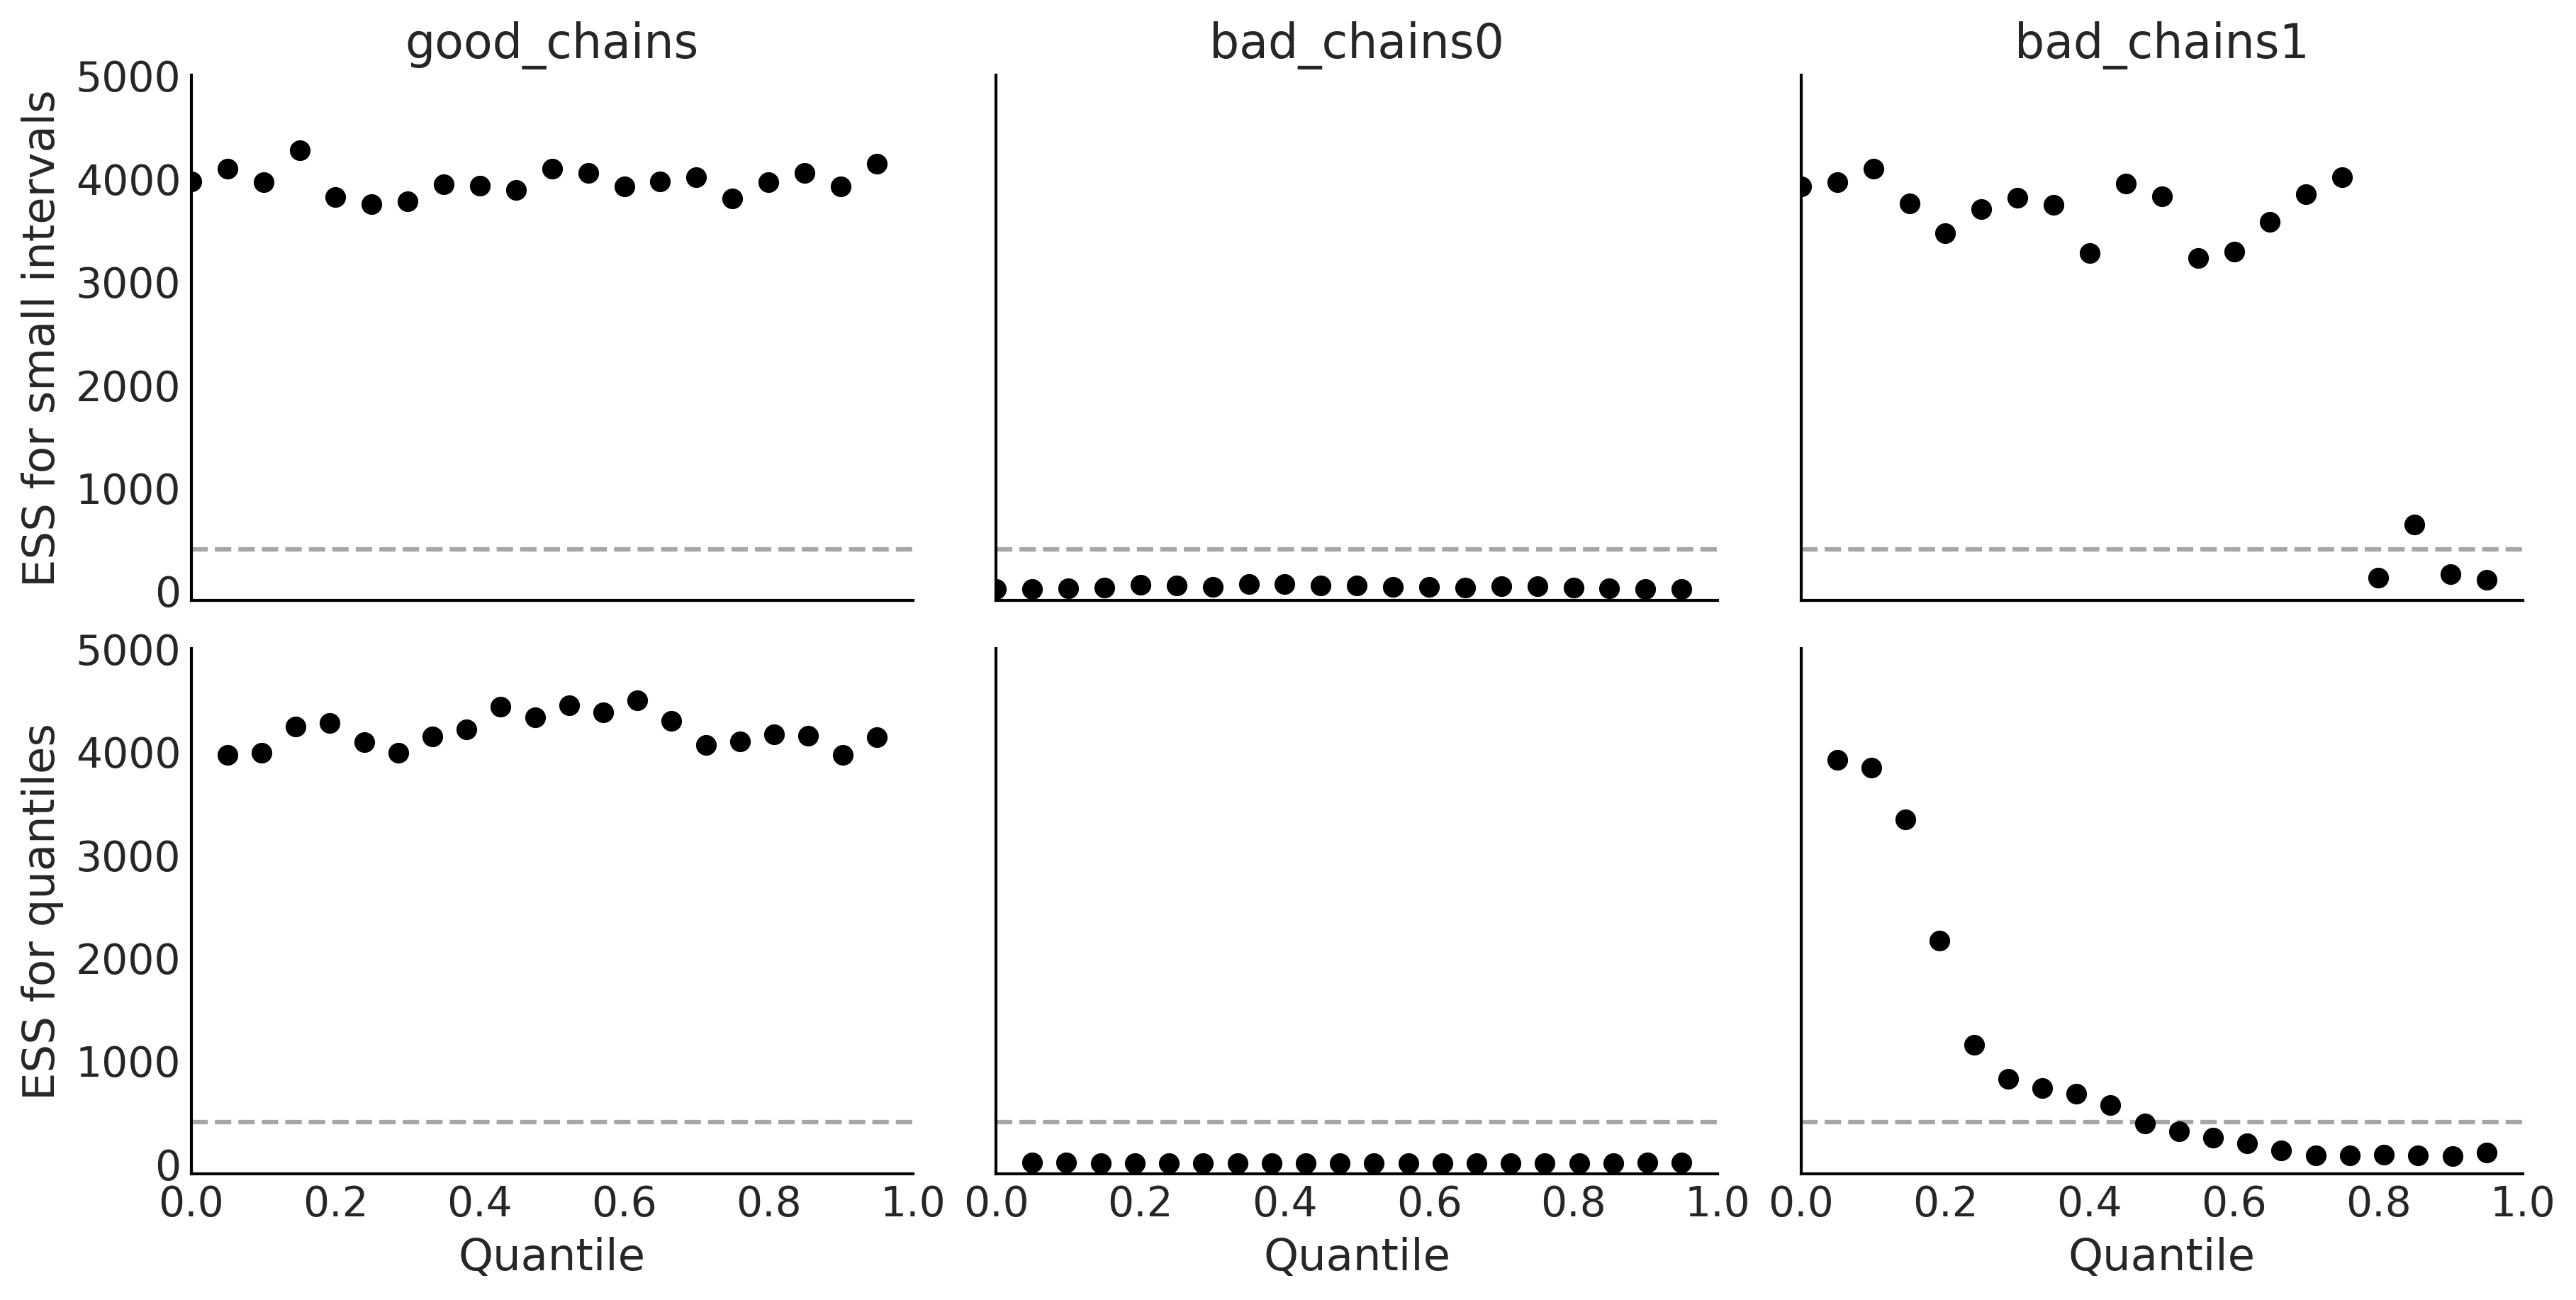

In [5]:
_, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True, sharex=True)
az.plot_ess(chains, kind="local", ax=axes[0])
az.plot_ess(chains, kind="quantile", ax=axes[1])

for ax_ in axes[0]:
    ax_.set_xlabel("")
for ax_ in axes[1]:
    ax_.set_title("")
    
for ax_ in axes[:,1:].ravel():
    ax_.set_ylabel("")
plt.ylim(-100, 5000)
plt.savefig("img/chp02/plot_ess.png")

In [6]:
az.rhat(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 1.0
    bad_chains0  float64 2.408
    bad_chains1  float64 1.033

In [7]:
az.mcse(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 0.002381
    bad_chains0  float64 0.1077
    bad_chains1  float64 0.01781

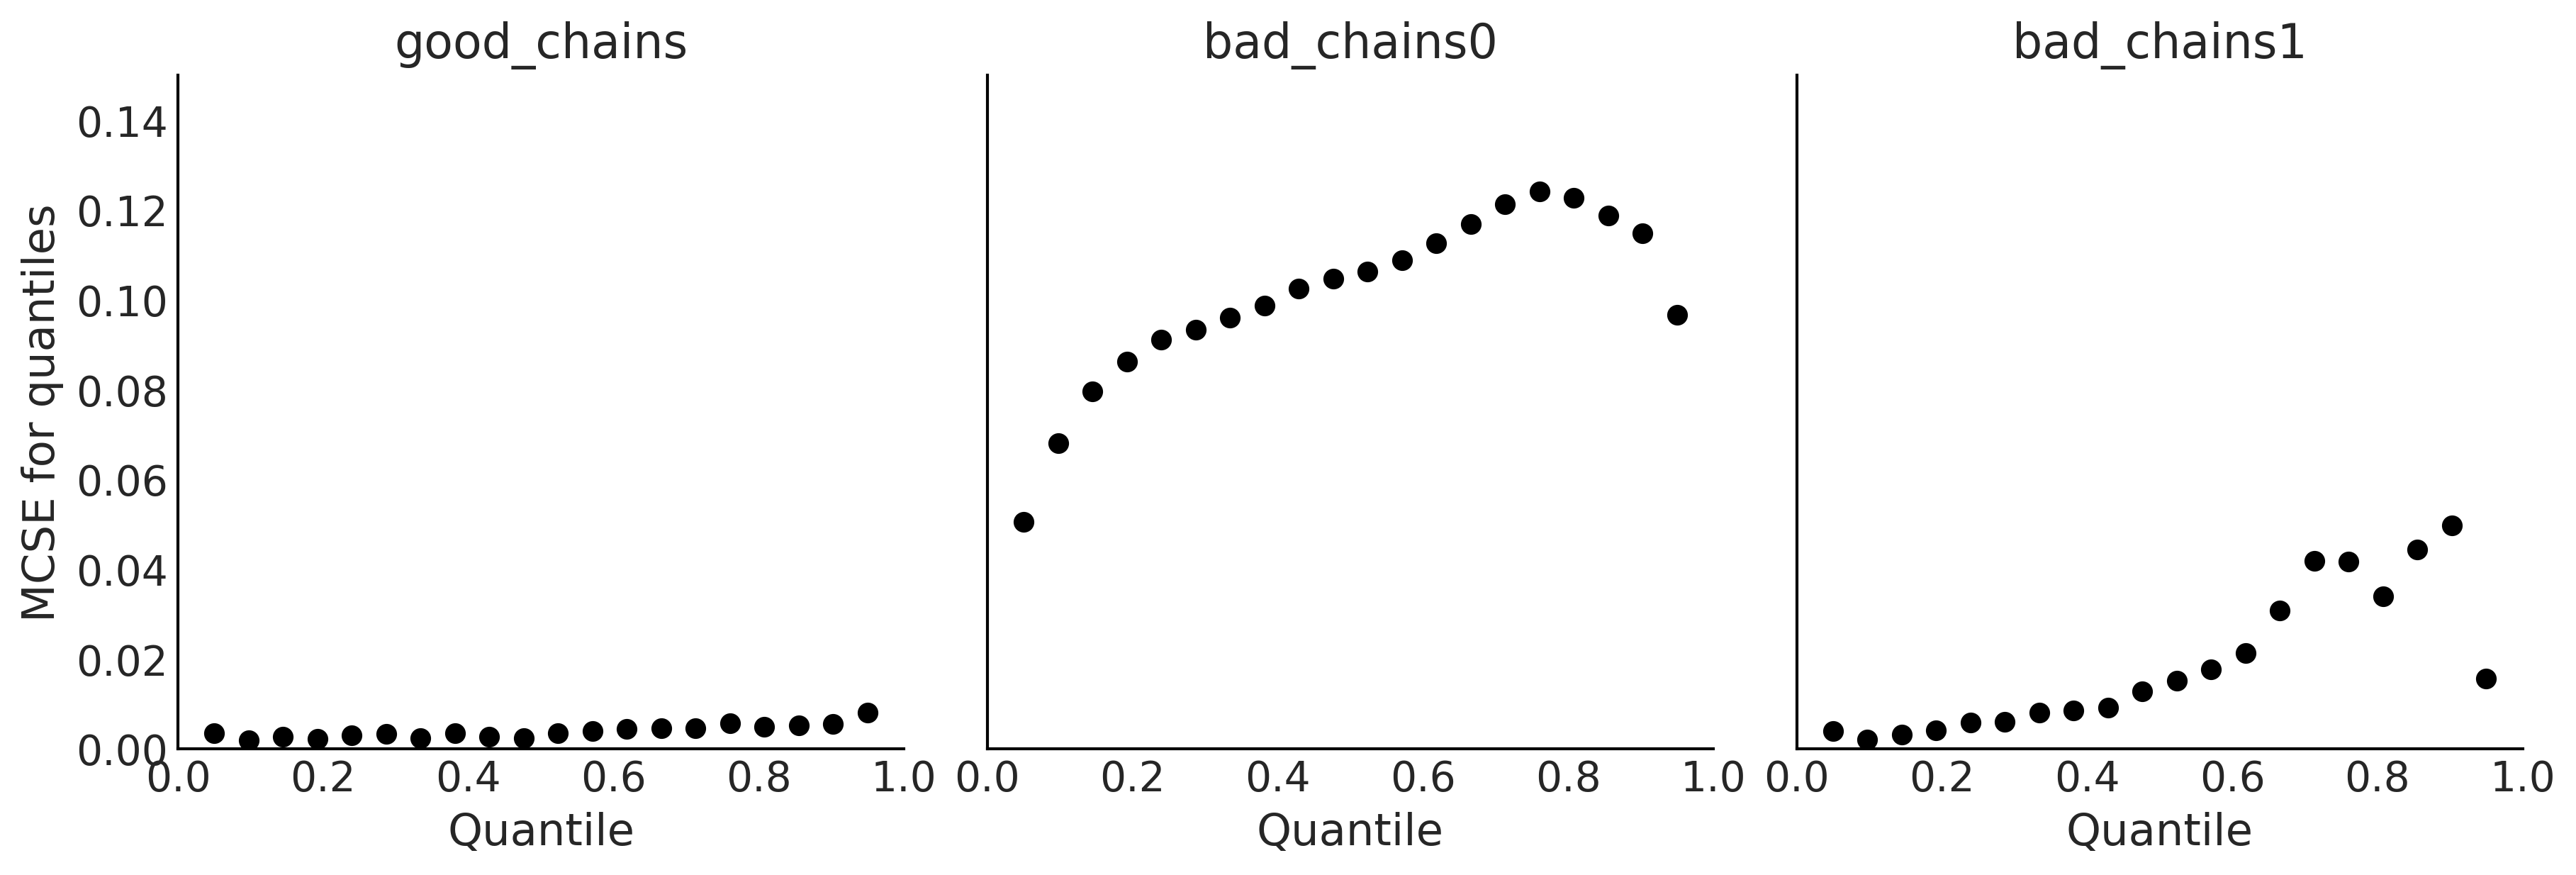

In [8]:
_, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
az.plot_mcse(chains, ax=axes)
for ax_ in axes[1:]:
    ax_.set_ylabel("")
    ax_.set_ylim(0, 0.15)

plt.savefig("img/chp02/plot_mcse.png")

In [9]:
az.summary(chains, kind="diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
good_chains,0.002,0.002,4389.0,3966.0,1.00
bad_chains0,0.108,0.088,2.0,11.0,2.41
bad_chains1,0.018,0.013,111.0,105.0,1.03


In [10]:
print(az.summary(chains, kind="diagnostics").to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  mcse\_mean &  mcse\_sd &  ess\_bulk &  ess\_tail &  r\_hat \\
\midrule
good\_chains &      0.002 &    0.002 &    4389.0 &    3966.0 &   1.00 \\
bad\_chains0 &      0.108 &    0.088 &       2.0 &      11.0 &   2.41 \\
bad\_chains1 &      0.018 &    0.013 &     111.0 &     105.0 &   1.03 \\
\bottomrule
\end{tabular}



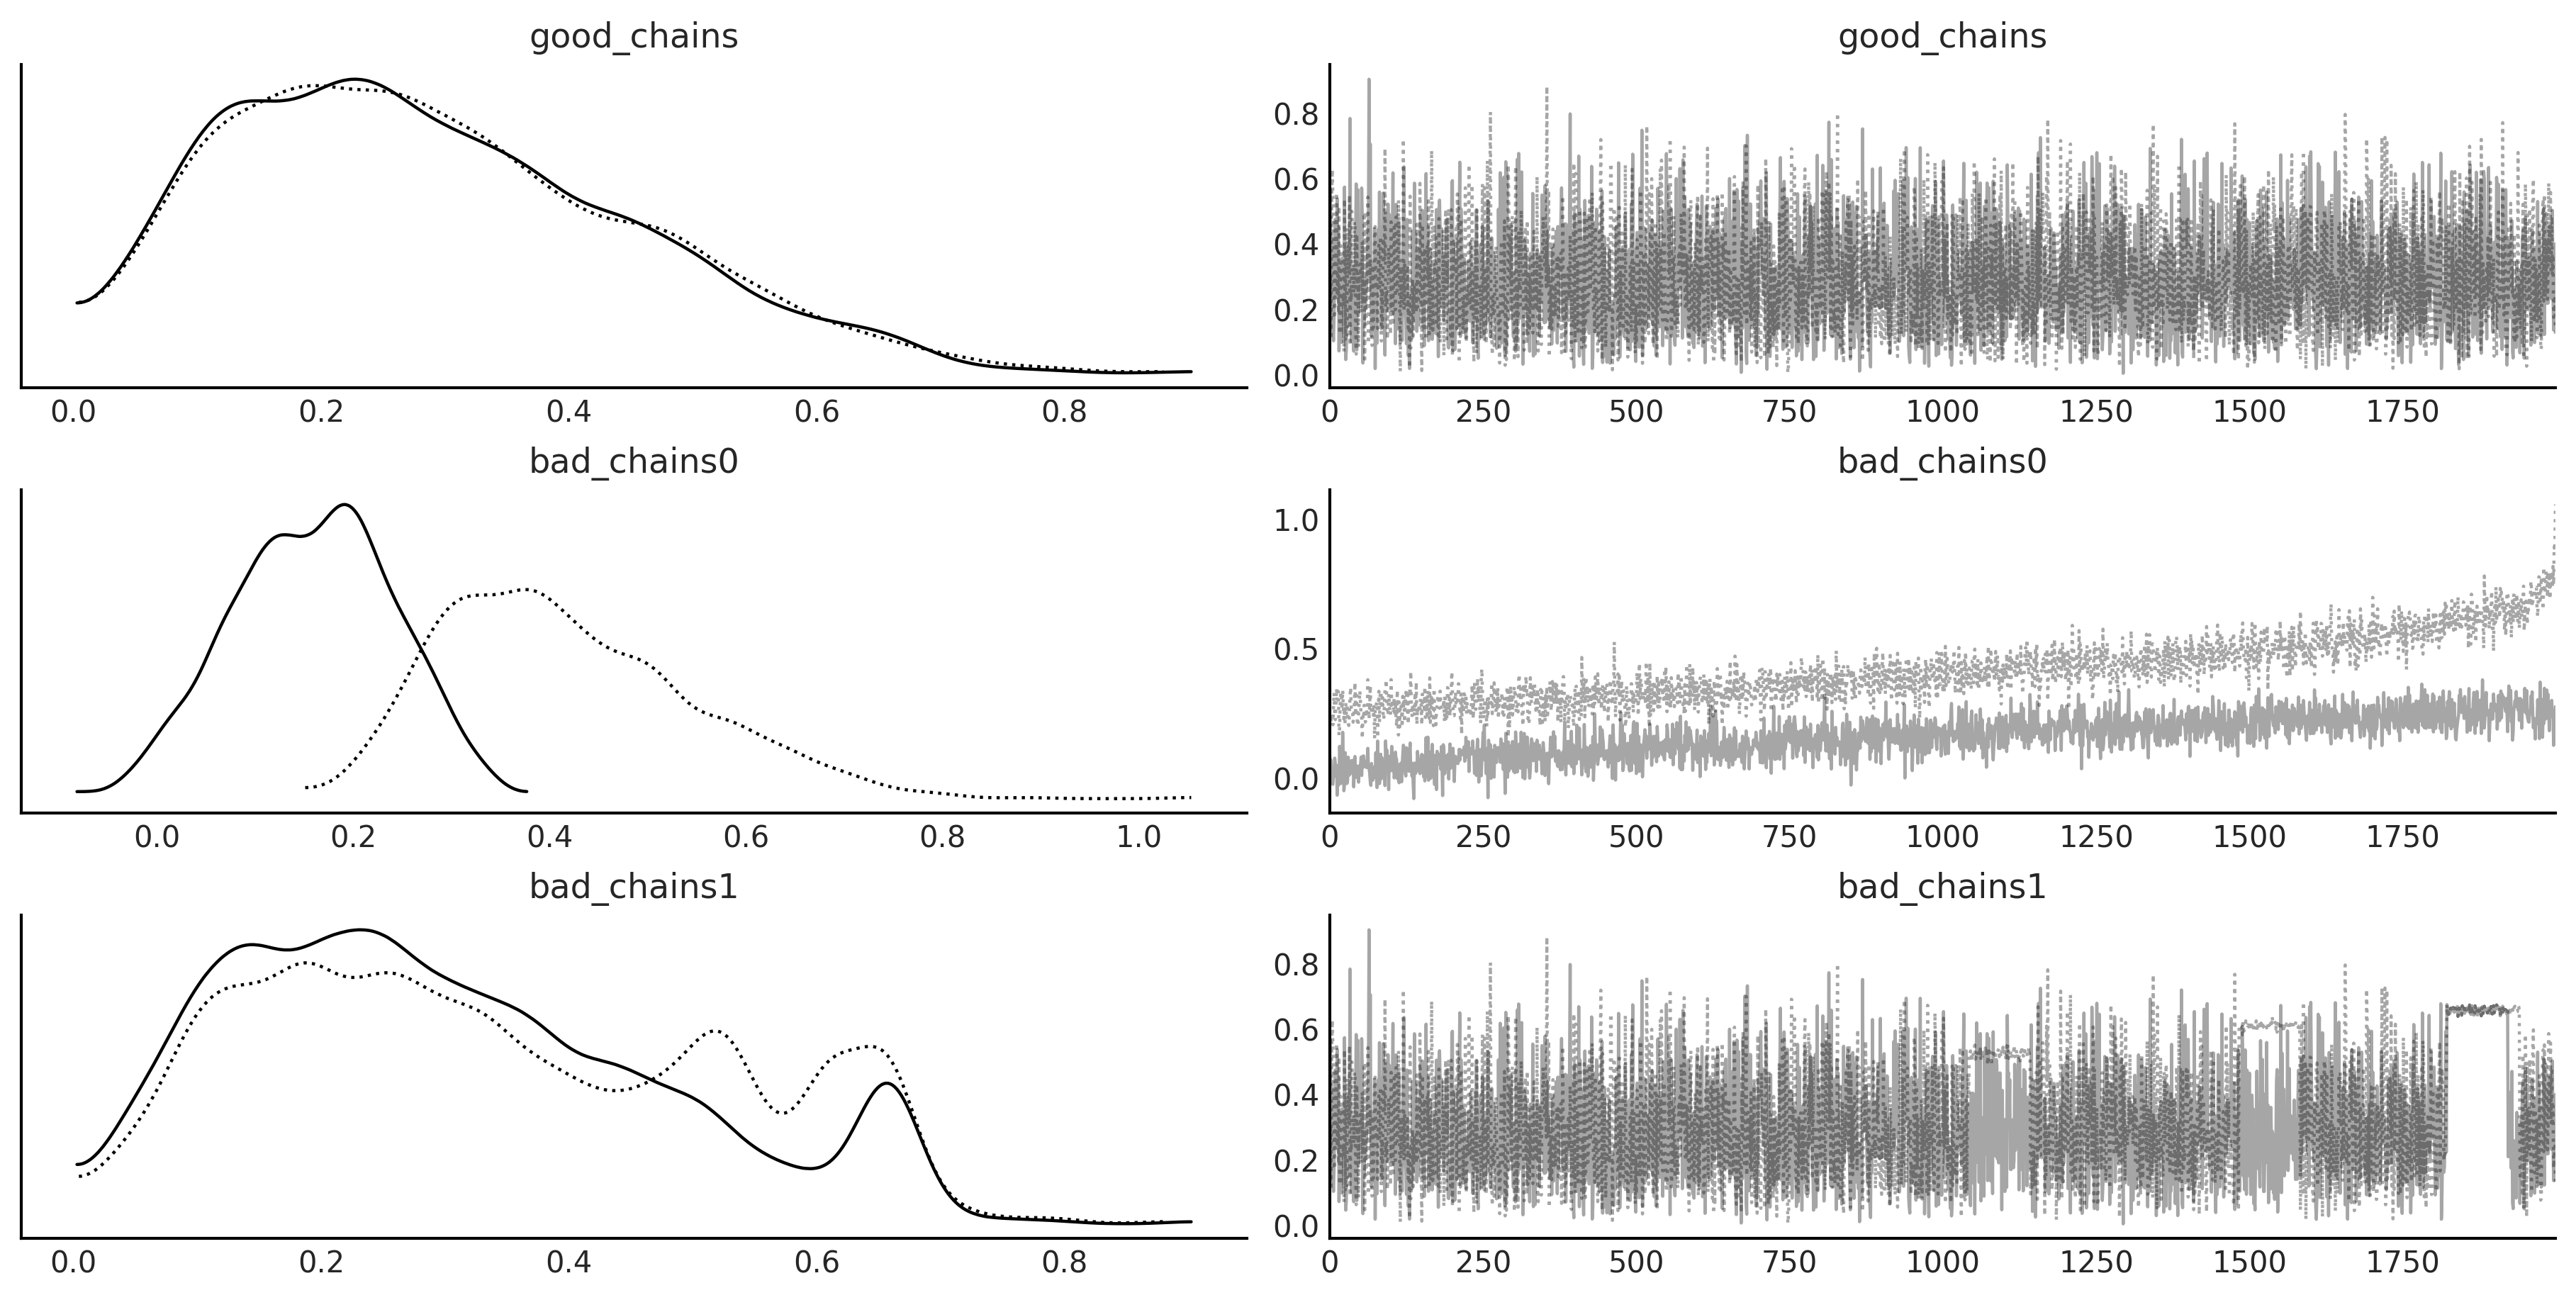

In [11]:
az.plot_trace(chains)
plt.savefig("img/chp02/trace_plots.png")

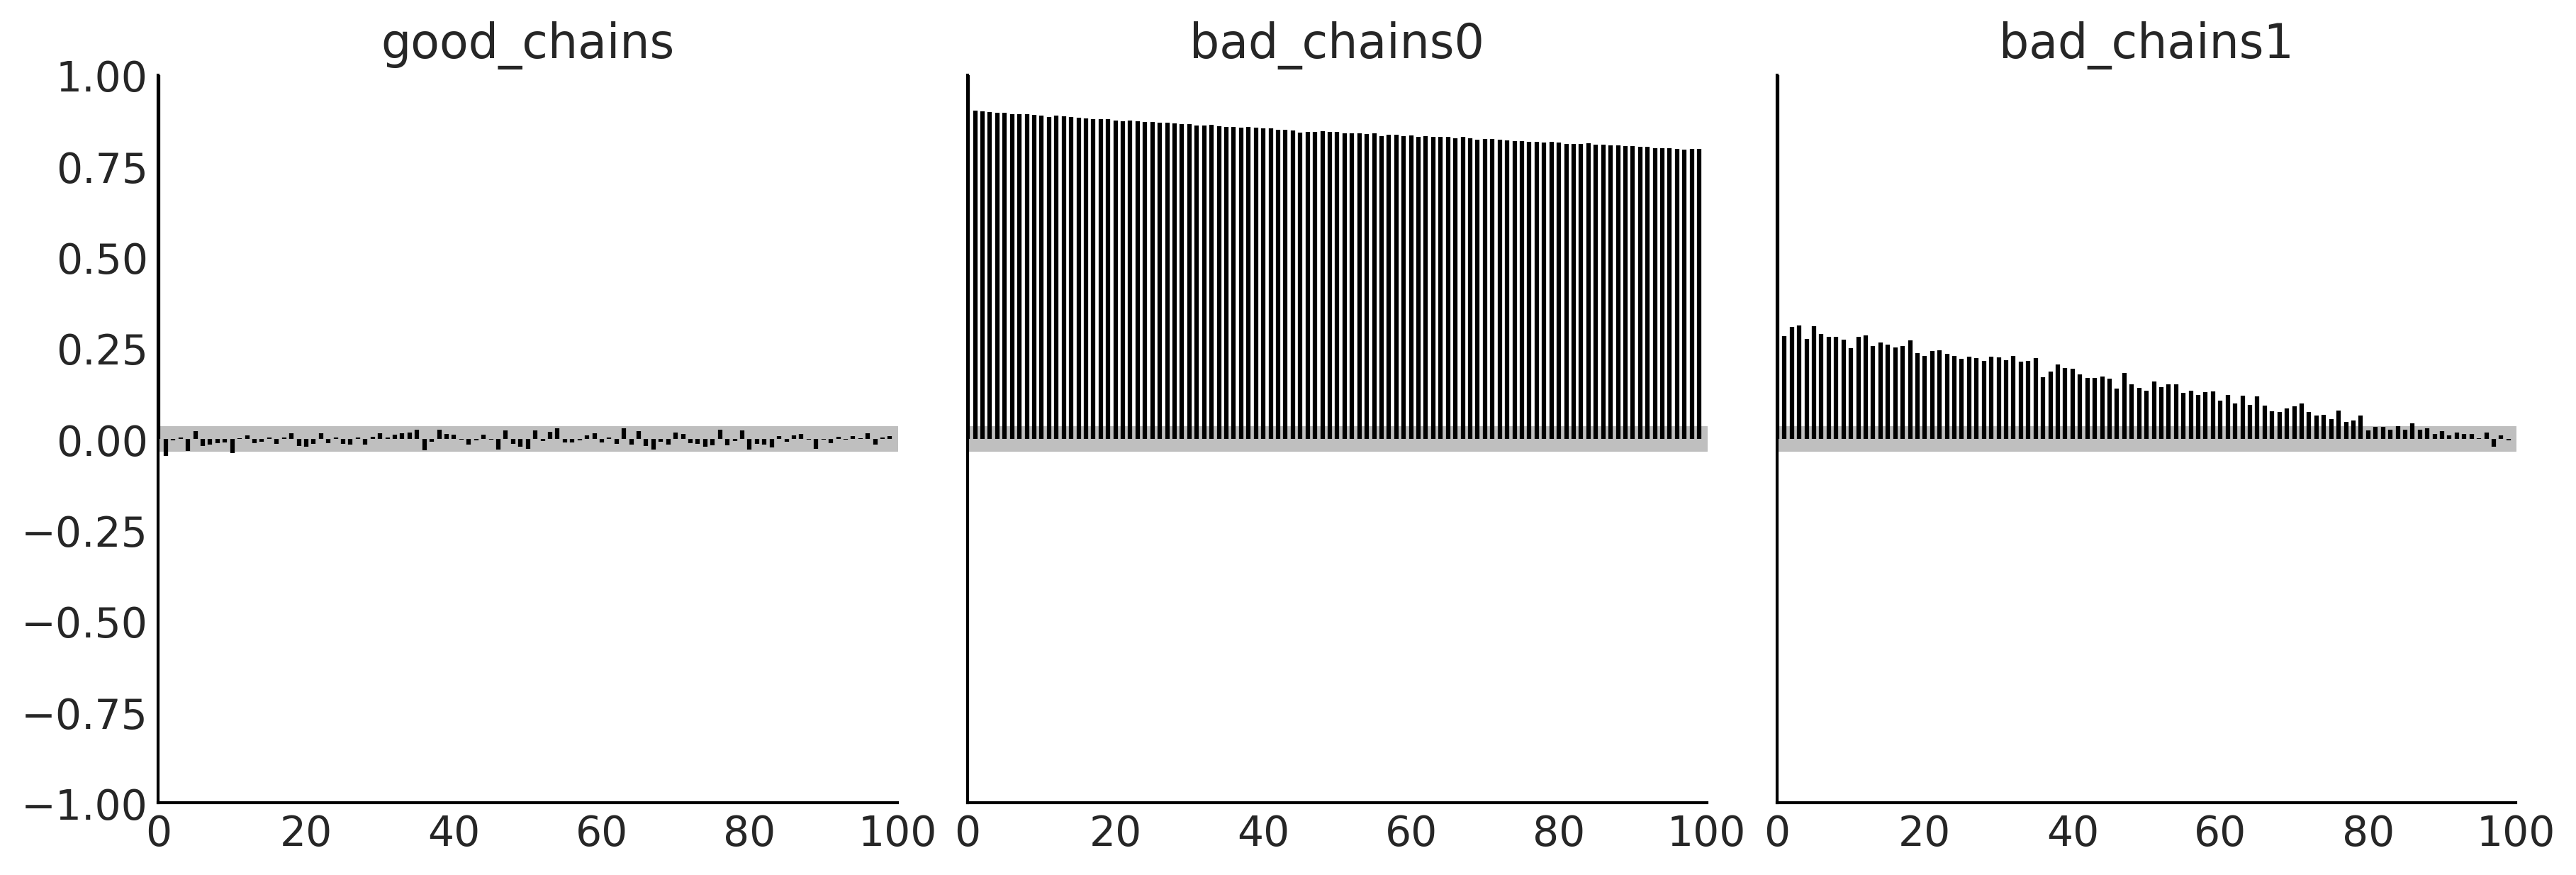

In [12]:
az.plot_autocorr(chains, combined=True, figsize=(12, 4))
plt.savefig('img/chp02/autocorrelation_plot.png')

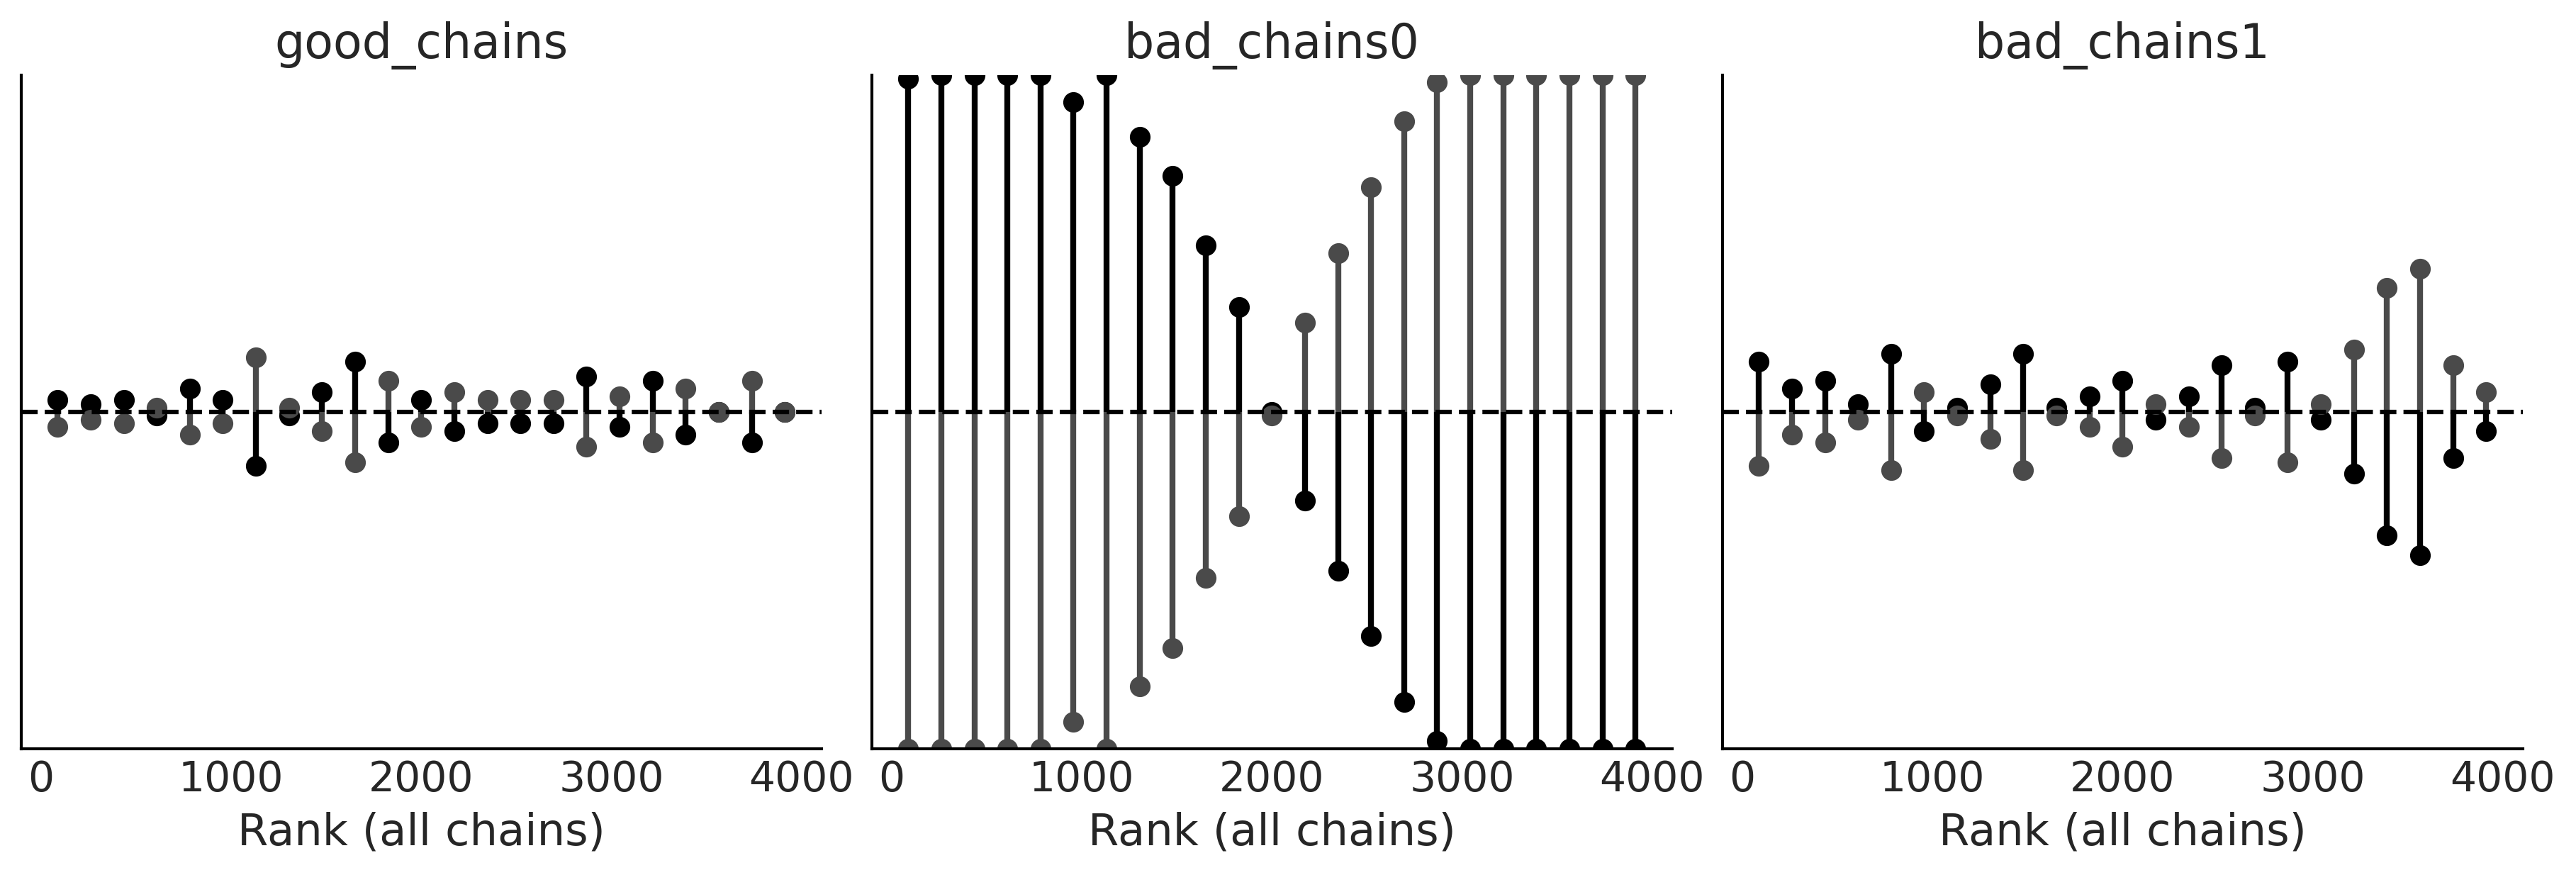

In [13]:
az.plot_rank(chains, kind="vlines", figsize=(12, 4))
plt.savefig('img/chp02/rank_plot_vlines.png')

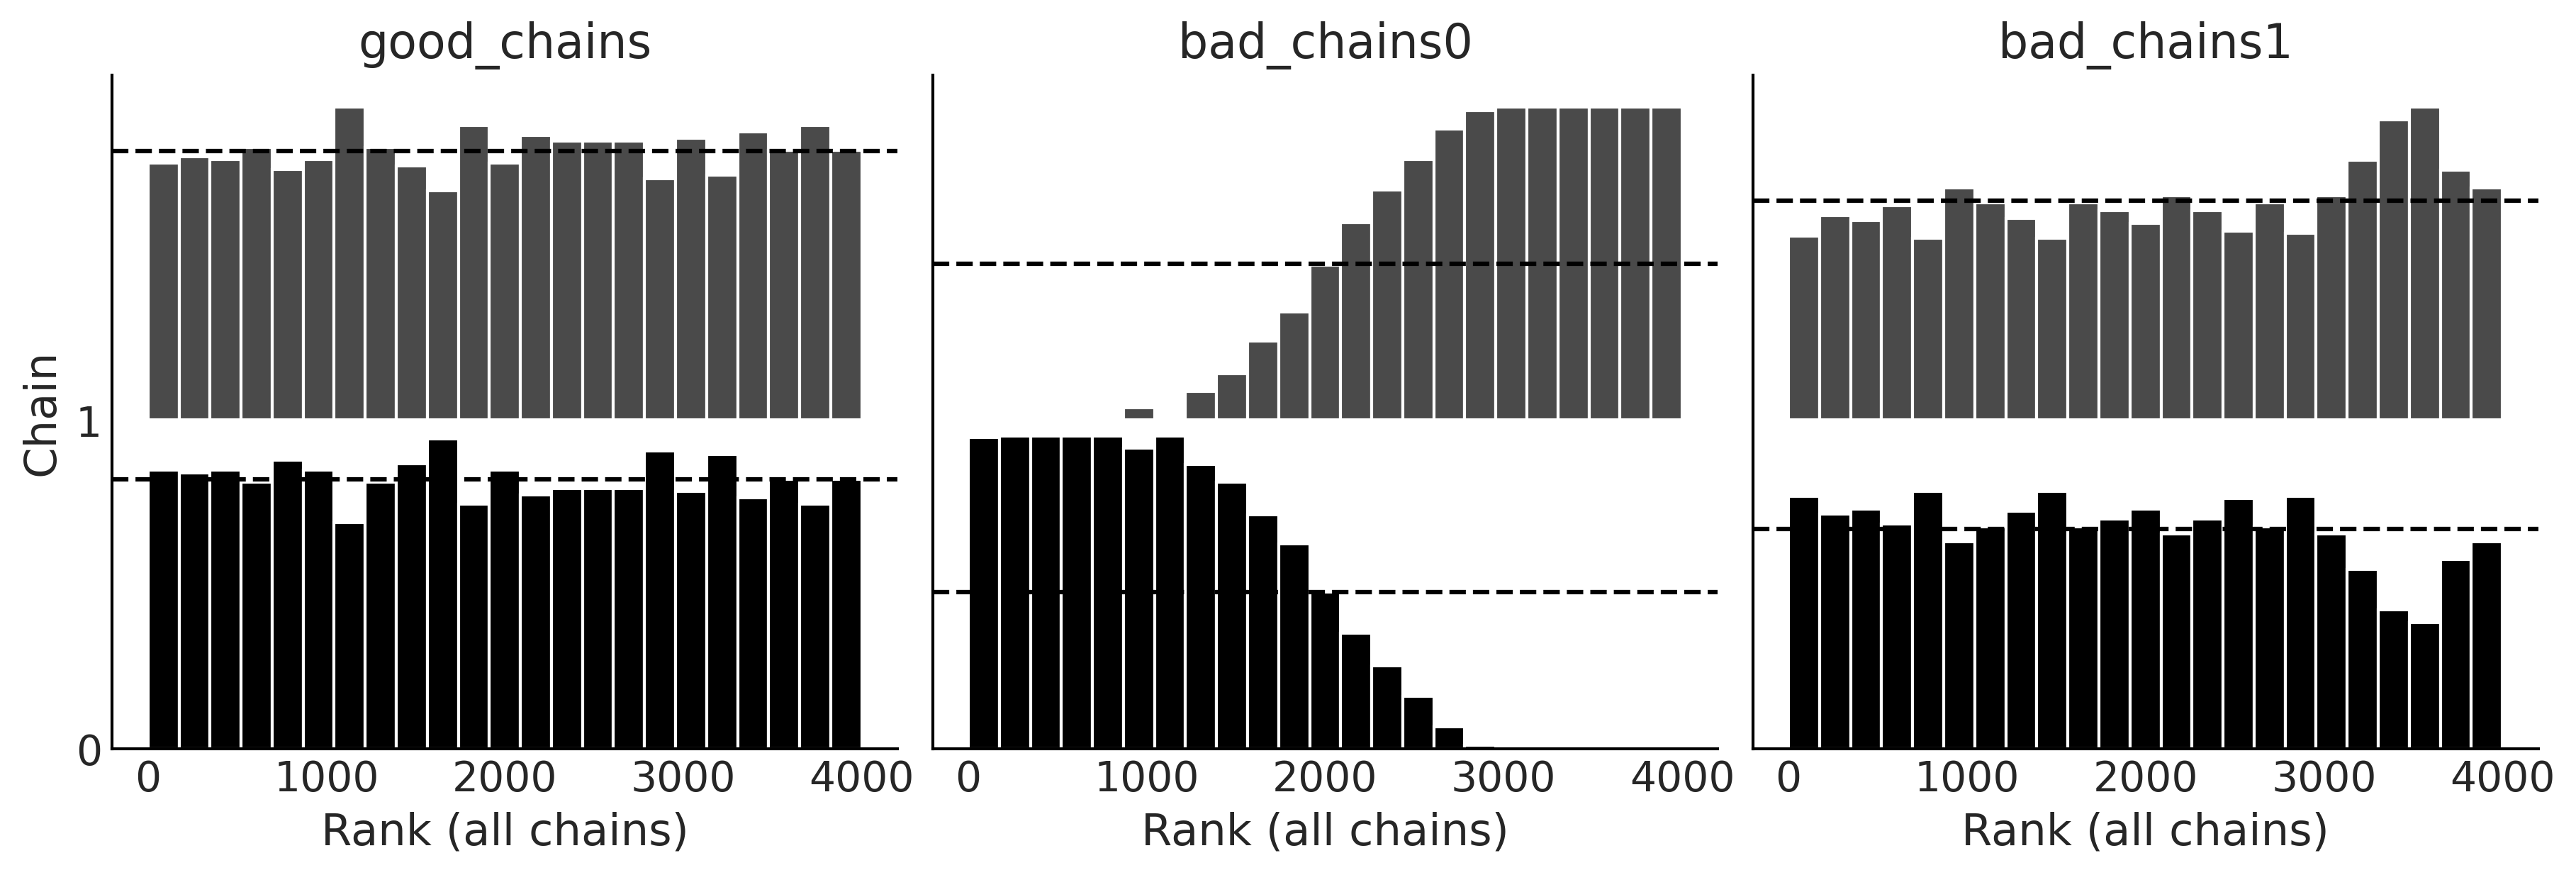

In [14]:
_, axes = plt.subplots(1, 3, figsize=(12, 4))
az.plot_rank(chains, kind="bars", ax=axes)
for ax_ in axes[1:]:
    ax_.set_ylabel("")
    ax_.set_yticks([])

plt.savefig('img/chp02/rank_plot_bars.png')

In [15]:
with pm.Model() as model_0:
    θ1 = pm.Normal("θ1", 0, 1, testval=0.1)
    θ2 = pm.Uniform("θ2", -θ1, θ1)
    idata_0 = pm.sample(return_inferencedata=True)

with pm.Model() as model_1:
    θ1 = pm.HalfNormal("θ1", 1 / (2/np.pi)**0.5)
    θ2 = pm.Uniform("θ2", -θ1, θ1)
    idata_1 = pm.sample(return_inferencedata=True)
    
with pm.Model() as model_1bis:
    θ1 = pm.HalfNormal("θ1", 1 / (2/np.pi)**0.5)
    θ2 = pm.Uniform("θ2", -θ1, θ1)
    idata_1bis = pm.sample(return_inferencedata=True, target_accept=0.95)
    
idatas = [idata_0, idata_1, idata_1bis]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ2, θ1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 503 divergences after tuning. Increase `target_accept` or reparameterize.
There were 579 divergences after tuning. Increase `target_accept` or reparameterize.
There were 614 divergences after tuning. Increase `target_accept` or reparameterize.
There were 604 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ2, θ1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8922895133642398, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ2, θ1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


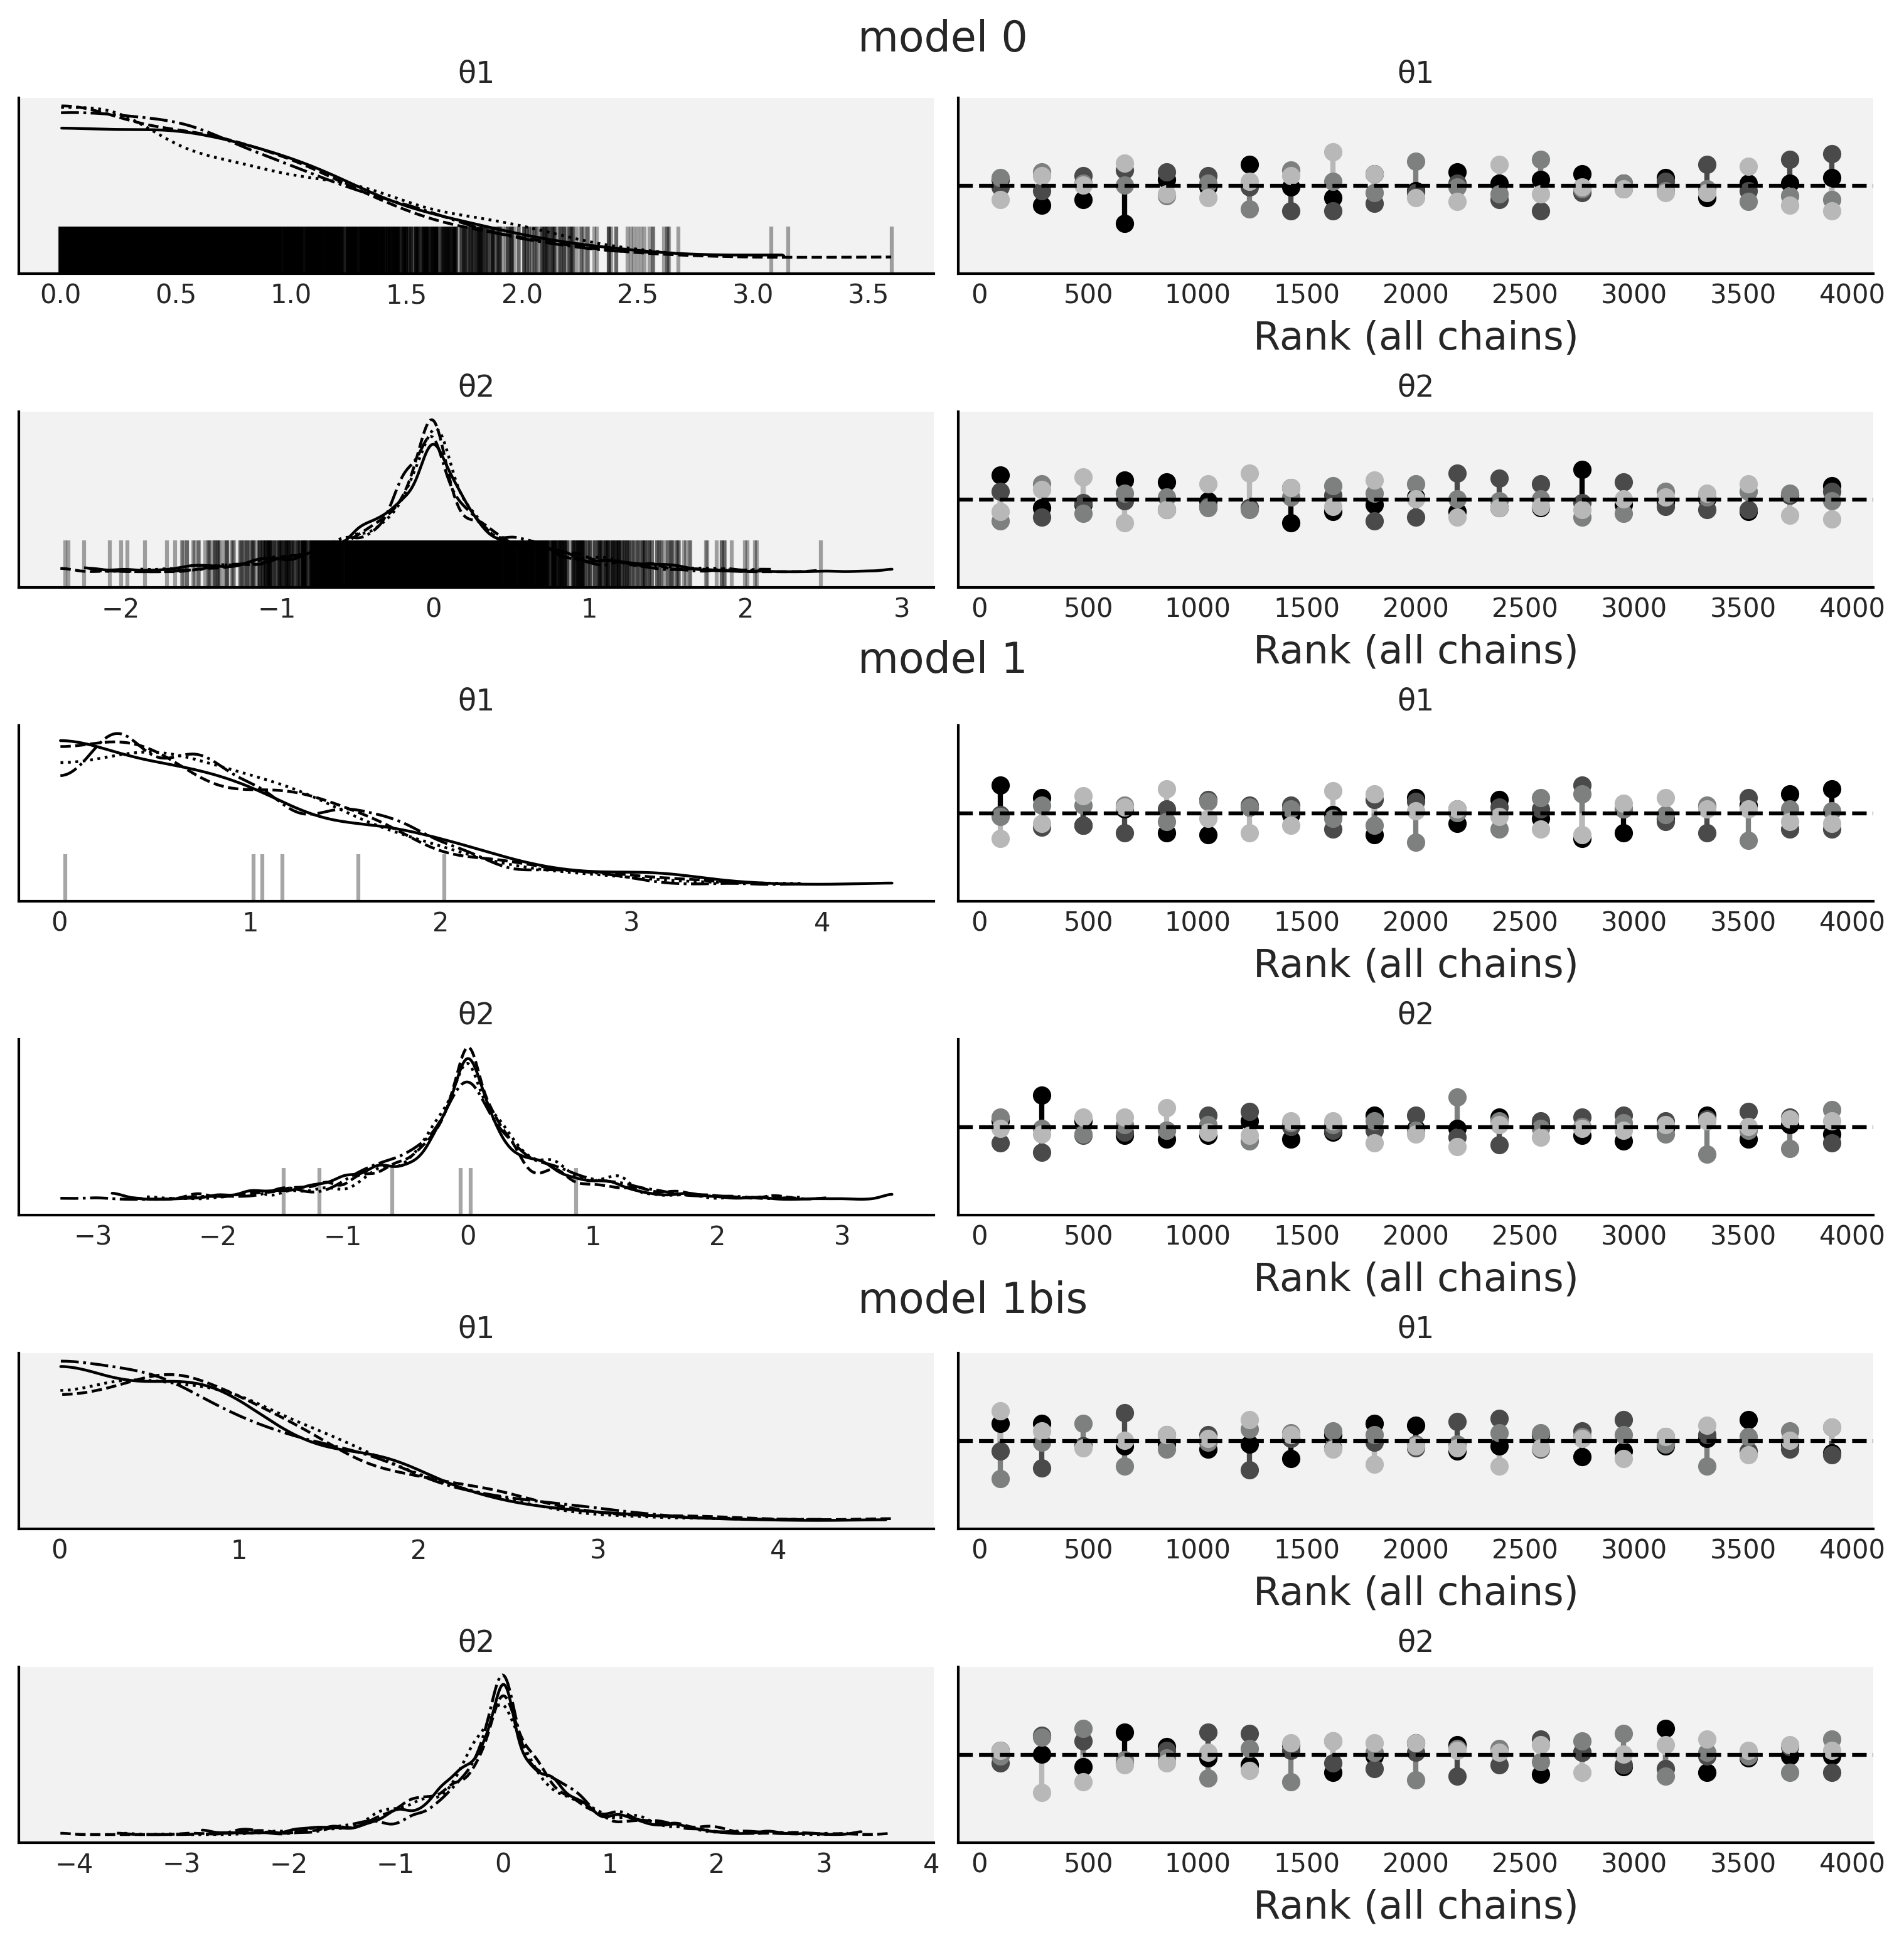

In [16]:
fig, axes = plt.subplots(6, 2, figsize=(10, 10))

axes = axes.reshape(3, 2, 2)
for idata, ax, color in zip(idatas, axes, ["0.95", "1", "0.95"]):
    az.plot_trace(idata, kind="rank_vlines", axes=ax);
    [ax_.set_facecolor(color) for ax_ in ax.ravel()]
fig.text(0.45, 1, s="model 0", fontsize=16)
fig.text(0.45, 0.67, s="model 1", fontsize=16)
fig.text(0.45, 0.33, s="model 1bis", fontsize=16)
plt.savefig("img/chp02/divergences_trace.png", bbox_inches="tight")

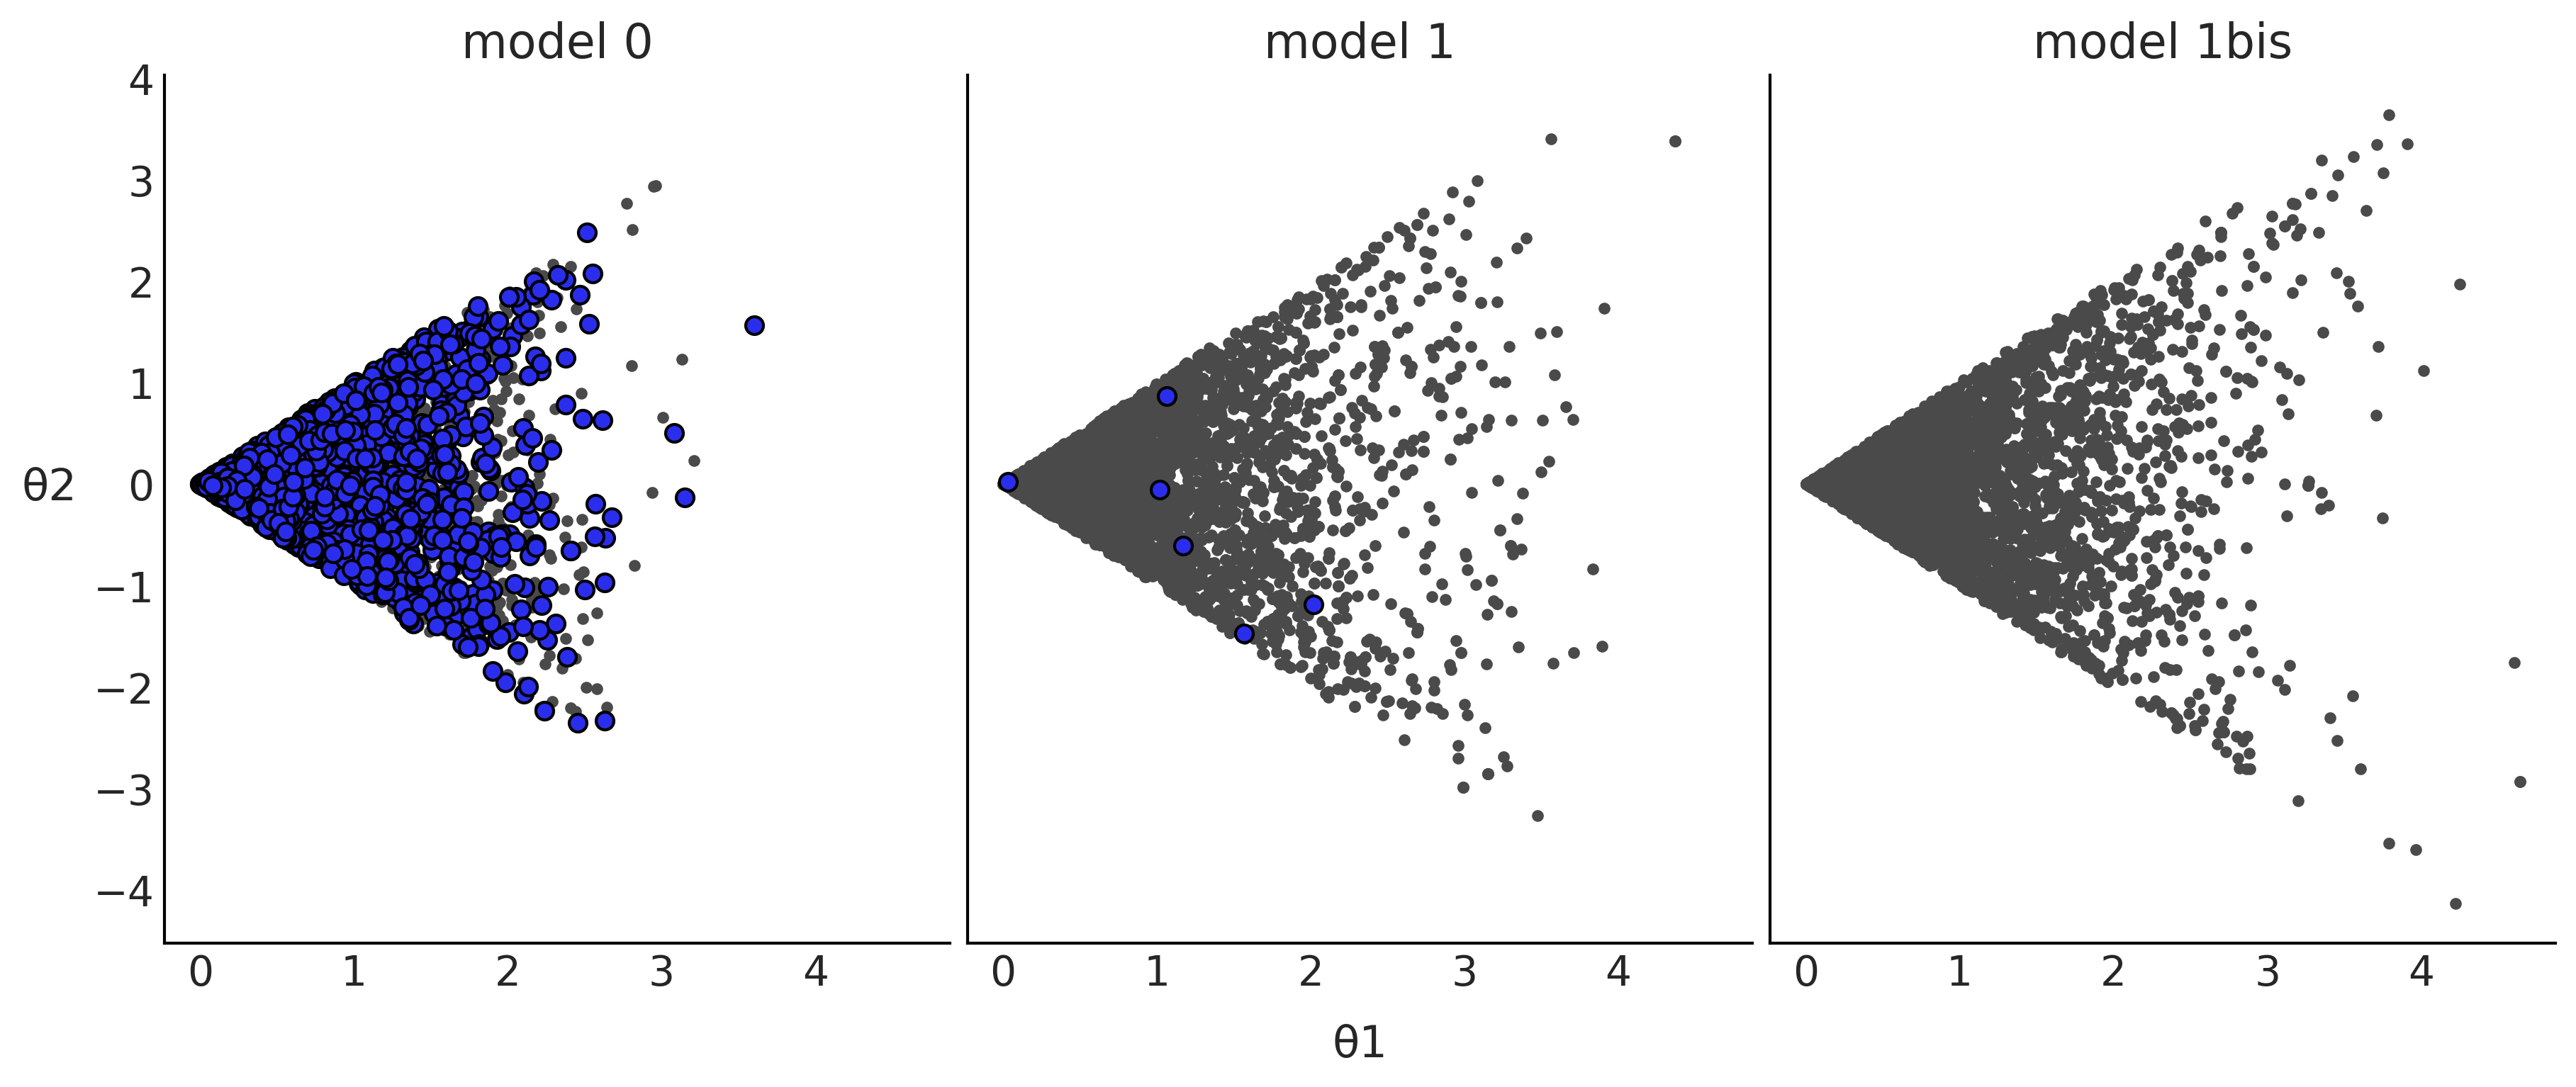

In [17]:
_, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

for idata, ax, model in zip(idatas, axes, ["model 0", "model 1", "model 1bis"]):
    az.plot_pair(idata, divergences=True, scatter_kwargs={"color":"C1"}, divergences_kwargs={"color":"C4"}, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(model)
axes[0].set_ylabel('θ2', rotation=0, labelpad=15)
axes[1].set_xlabel('θ1', labelpad=10)
plt.savefig("img/chp02/divergences_pair.png")